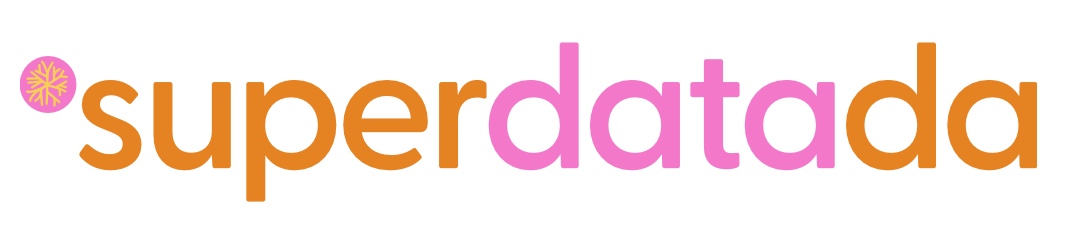

# 💻 ¿Cuántas horas de Luis Miguel son posibles? 😍🕒




Primero usamos una API Spotipy 🎵 para descargar sus rolitas y subimos el dataset a kaggle para que todes les SDianes 👽 lo puedan usar. Luego sacamos el promedio de duración ⏱️ para ver cuántas canciones caben en una hora 🎶🧠

¡Listo! 💥 Ya tenemos **n** (el total de canciones de LuisMi 💛)
y **k** (cuántas hacen una hora completa ⌛).


Aplicamos la fórmula de combinaciones 🤓🔢 y ¡vualá! 🎩✨

$\displaystyle C(n, k) = \binom{n}{k} = \frac{n!}{k!(n - k)!}$



Después convertimos todo a días y luego a años 😱📆

💥 Pero espera... ¡lo comparamos con la vida restante del sol! ☀️🌌
¡Una verdadera locura cósmica! 🚀🌠

Espero que te guste, reutiliza lo que necesites sin miedo 😎💡

# 1. Prep ⚙️

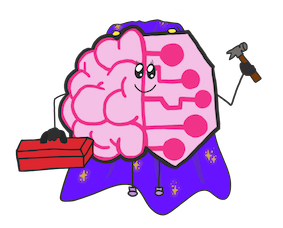

In [ ]:
%pip install spotipy
%pip install kagglehub

In [ ]:
import pandas as pd
import itertools
import math
import spotipy
import kagglehub
import unidecode

# 2. Datos 📊

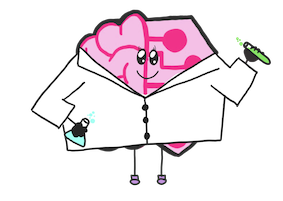

In [ ]:
# Descargar la lista de canciones de Luis Miguel
path = kagglehub.dataset_download("superdatada/canciones-de-luismi")
df_canciones_luismi = pd.read_csv(path + "/canciones_luismi.csv")
df_canciones_luismi['song'] = df_canciones_luismi['song'].apply(lambda x: unidecode.unidecode(x.lower()).strip()) # normalizar texto
df_canciones_luismi.drop_duplicates(subset='song', inplace=True) #quitar canciones duplicadas en otros albumes

# 3. Análisis 🧠

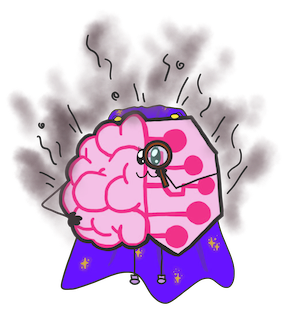

In [ ]:
# Definir las constantes de tiempo
minuto = 60
hora = 24
años = 365.25 #bisiesto

Obtenemos cuánto duran las canciones de Luis Miguel en promedio, convertimos de segundos a minutos.

In [ ]:
print('Total canciones Luis Miguel:',df_canciones_luismi.shape[0])

In [ ]:
duracion_promedio_minutos = df_canciones_luismi.duration_seconds.mean()/minuto
print(f'Duración promedio en minutos: {duracion_promedio_minutos:.2f}')

Ahora, ¿cuántas canciones necesitamos para completar 1 hora?

In [ ]:
print(f'Total canciones en 1 hora: {minuto/duracion_promedio_minutos:.2f}')

$\displaystyle C(n, k) = \binom{n}{k} = \frac{n!}{k!(n - k)!} = \frac{300!}{16!(300 - 16)!} $

In [ ]:
n = 300 #total canciones
k = 16 #total canciones en una hora

combinaciones = math.comb(n, k)
print(f'Total Horas de Luis Miguel: {combinaciones}')

¿A cuántos años es equivalente?

In [ ]:
print(f'Convirtiendo a años: {combinaciones / hora / años}')

¿y quién gana, el Sol de México o el Sol de la galaxia?

[Vida restante del Sol](https://spaceplace.nasa.gov/sun-age/sp/#:~:text=Las%20estrellas%20como%20nuestro%20Sol,millones%20de%20a%C3%B1os%20de%20vida.)


5,000,000,000 (Cinco mil millones de años)

In [ ]:
sol = 5000000000
print(f'Luis Miguel equivale a {combinaciones / hora / años / sol:.2f} soles')

 # 4. Anexo: Obtener la lista de canciones desde Spotify

In [ ]:
from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='your-client-id', client_secret='your-client-secret'))

# Buscar al artista (cantante mexicano)
artist_name = 'Luis Miguel'  # Reemplaza con el nombre del artista que desees
result = sp.search(q='artist:' + artist_name, type='artist')

# Obtener el ID de Spotify del artista
artist_id = result['artists']['items'][0]['id']

# Obtener los álbumes del artista
albums = sp.artist_albums(artist_id, album_type='album', limit=50)  # Puedes cambiar el límite si lo necesitas

# Inicializar una lista vacía para guardar los datos
data = []

# Iterar por los álbumes y obtener detalles de las canciones (nombre del álbum, título de la canción y duración en segundos)
for album in albums['items']:
    album_name = album['name']

    # Obtener las canciones del álbum
    tracks = sp.album_tracks(album['id'])

    for track in tracks['items']:
        song_title = track['name']
        duration_ms = track['duration_ms']
        duration_sec = duration_ms / 1000  # Convertir de milisegundos a segundos

        # Agregar los datos a la lista
        data.append({
            'album': album_name,
            'song': song_title,
            'duration_seconds': duration_sec
        })

# Convertir la lista de datos en un DataFrame
df_canciones = pd.DataFrame(data)

# Mostrar el DataFrame
print(df_canciones)